Variables $\{x_1,x_2,\ldots,x_n\}$ are i.i.d. generated from $p(X_i=x)$, $i=1,\ldots,n$

Variables $c_i = x_i + x_{i+1}$, $i=1,\ldots,n-1$, are obtained by summing consequtive $x_i$ and $x_{i+1}$. 


Task 1 (Convolution): Given $P(X_i=x)$, $i=1,\ldots,n$, compute $P(C_i=c)$, $i=1,\ldots,n-1$. 

Task 2 (Deconvolution): Given $p(C_i=c)$, $i=1,\ldots,n-1$, find $p(X_i=x)$, $i=1,\ldots,n$

In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import seqevents_general as se

Kx = 5   # max num events per dense window; x1 is from {0,1,...,Kx}
N  = 20  # length of the dense sequence x1,...xN
W  = 2   # window size

Px = np.random.rand( Kx + 1, N )
Px = Px / np.sum( Px, axis=0)

ev = se.Events( W )
Pc = ev.conv( Px )

Px_est, Pc_est, kl_hist = ev.deconv( Pc )




100%|██████████| 50/50 [00:02<00:00, 21.72it/s]


Text(0.5, 1.0, 'estimated P(c)')

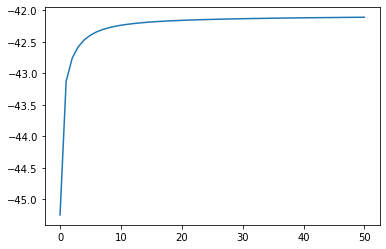

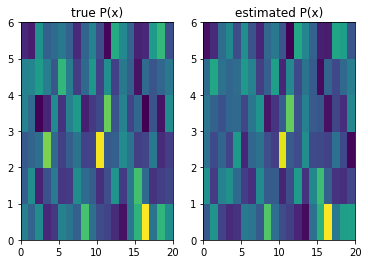

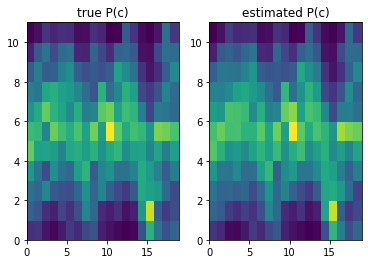

In [3]:
import matplotlib.pyplot as plt


plt.figure()
plt.plot( kl_hist )

plt.figure()
plt.subplot(1,2,1)
plt.pcolor( Px)
plt.title( "true P(x)")
plt.subplot(1,2,2)
plt.pcolor( Px_est )
plt.title( "estimated P(x)")

plt.figure()
plt.subplot(1,2,1)
plt.pcolor( Pc)
plt.title( "true P(c)")
plt.subplot(1,2,2)
plt.pcolor( Pc_est )
plt.title( "estimated P(c)")

